In [117]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
print(df.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15624511    Male   35            20000          0
2  15624512  Female   26            43000          0
3  15624513  Female   27            57000          0
4  15624514    Male   19            76000          0
5  15624515    Male   27            58000          0
6  15624516  Female   27            84000          0
7  15624517  Female   32           150000          0
8  15624518    Male   25            33000          1
9  15624519  Female   35            65000          0


In [168]:
# X = df[['Gender', 'Age', 'EstimatedSalary']]
X=df.iloc[:, :-1]
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15624511,Male,35,20000
2,15624512,Female,26,43000
3,15624513,Female,27,57000
4,15624514,Male,19,76000
5,15624515,Male,27,58000
6,15624516,Female,27,84000
7,15624517,Female,32,150000
8,15624518,Male,25,33000
9,15624519,Female,35,65000


In [169]:
# y = df['Purchased']
y = df.iloc[:,4]
y

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Purchased, dtype: int64

In [170]:
import numpy as np
m = X.shape[0]    #m is no of rows in dataset
a = np.ones((m, 1))
X.insert(loc = 0, column = 'Ones', value = a)

In [121]:
m

10

In [157]:
y

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Purchased, dtype: int64

In [171]:
X.loc[X['Gender'] == 'Male', 'Gender_Male'] = 1         #1 if male
X.loc[X['Gender'] == 'Female', 'Gender_Male'] = 0       #0 if female
del X['Gender'] 

In [172]:
age_std = X['Age'].std()
age_ave = X['Age'].mean()
sala_std = X['EstimatedSalary'].std()
sala_ave = X['EstimatedSalary'].mean()
X['Age'] = (X['Age'].subtract(age_ave)).divide(age_std)
X['EstimatedSalary'] =(X['EstimatedSalary'].subtract(sala_ave)).divide(sala_std)

In [173]:
age_std

5.633234713140696

In [174]:
age_ave

27.2

In [175]:
sala_std

38393.43115111693

In [176]:
sala_ave

60500.0

In [177]:
X['Age']

0   -1.455647
1    1.384640
2   -0.213021
3   -0.035504
4   -1.455647
5   -0.035504
6   -0.035504
7    0.852086
8   -0.390539
9    1.384640
Name: Age, dtype: float64

In [178]:
X['EstimatedSalary']

0   -1.080914
1   -1.054868
2   -0.455807
3   -0.091161
4    0.403715
5   -0.065115
6    0.612084
7    2.331128
8   -0.716268
9    0.117208
Name: EstimatedSalary, dtype: float64

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [147]:
X_train = X_train.values
print(type(X_train))
print(X_train)

<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [180]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
X_test

array([[ 1.00000000e+00,  1.56245180e+07, -3.90539381e-01,
        -7.16268361e-01,  1.00000000e+00],
       [ 1.00000000e+00,  1.56245110e+07,  1.38463962e+00,
        -1.05486795e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.56245150e+07, -3.55035801e-02,
        -6.51153055e-02,  1.00000000e+00]])

In [70]:
#X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [71]:
#X_train = X_train.values
#X_train

In [181]:
def sigmoid(z):
 return (1/(1+np.exp(-z)))

In [95]:
sigmoid(z)

NameError: name 'z' is not defined

In [151]:
# X_train=X_train.astype(float)
np.dot(X_train,theta)
# 
# X_train.dtypes

TypeError: can't multiply sequence by non-int of type 'float'

In [182]:
def h(theta, X):
 return sigmoid(np.matmul(X, theta))

In [98]:
 h(theta, X)

TypeError: Object arrays are not currently supported

In [184]:
#cost functions
def cost_function(X, y, theta, m):
 y = y.reshape(y.shape[0], 1)
 H = h(theta, X)
 return (sum((y)*np.log(H) + (1-y)*np.log(1-H))) / (-m)

In [185]:
cost_function(X_train, y_train, theta, m)

array([0.69314718])

In [189]:
m = X_train.shape[0]  #number of rows
n = X_train.shape[1]
theta = np.zeros((n, 1))
alfa = 0.3

In [190]:
def gradient_descent(theta, X, y, alfa, m):
 H = h(theta, X)
 H = H.reshape((H.shape[0],))
 diff = np.subtract(H, y)
 a = np.matmul(np.transpose(X), diff).reshape((theta.shape[0],1))
 
 theta = theta - (alfa/m) * a
 return theta

In [191]:
gradient_descent(theta, X_train, y_train, alfa, m)

array([[-1.50000000e-01],
       [-2.34367716e+06],
       [ 2.05413571e-02],
       [-3.93482489e-02],
       [-4.28571429e-02]])

In [193]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from .csv
df_data = pd.read_csv("cracow_apartments.csv", sep=",")

# Used features and target value
features = ["size"]
target = ["price"]

# Slice Dataframe to separade feature vectors and target value
X, y = df_data[features].as_matrix(), df_data[target].as_matrix()

# Parameter sets
orange_parameters = {'b': 200, 'w': np.array([3.0])}
lime_parameters = {'b': -160, 'w': np.array([12.0])}

# Make prediction for every data sample
orange_pred = [predict(x, orange_parameters) for x in X]
lime_pred = [predict(x, lime_parameters) for x in X]

# Model error
mse_orange_error = mse(orange_pred, y)
mse_lime_error = mse(lime_pred, y)

FileNotFoundError: File b'cracow_apartments.csv' does not exist

In [192]:
# importing libraries
#for versions checkout requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing and reading data sets
data = pd.read_csv("bmi_and_life.csv")

#look at top 5 rows in data set
data.head()



#delete/drop 'Country' variable.
data = data.drop(['Country'], axis = 1)


#reading into variables
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 20, random_state = 0)

#import linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#fitting the model
lr.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Test set results
y_pred = lr.predict(X_test)

FileNotFoundError: File b'bmi_and_life.csv' does not exist

Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


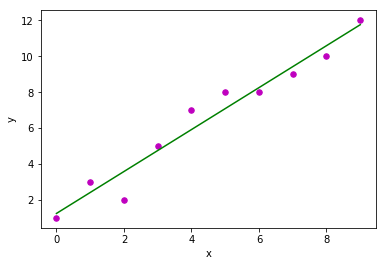

In [194]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


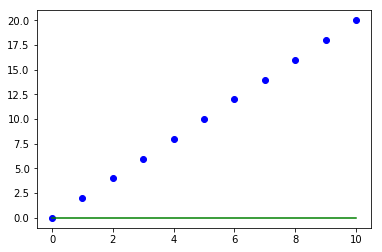

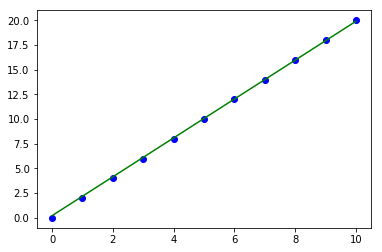

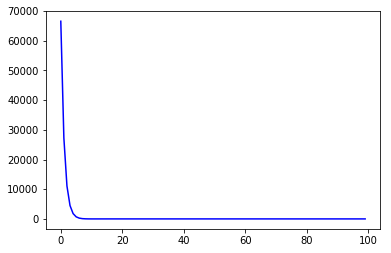

In [195]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()
